1.EXPLORATORY  DATA ANALYSIS

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import nltk
from nltk.tokenize import RegexpTokenizer
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataBreaches.csv',sep=';')
df.head()

,Entity,Alternative Name,Story,Year,Records Lost,Sector,Method of Leak,1st source,2nd source,3rd source,Source name
0,River City Media,Spam operator,A dodgy backup has allegedly resulted in over ...,2017,"1,37e+09",Web,Accidentally published,https://betanews.com/2017/03/06/river-city-med...,NaN,NaN,Beta News
1,Unique Identification Authority of India,Aadhaar data base,A report says that full data base has been exp...,2017,1e+09,Government,Poor security,http://www.tribuneindia.com/news/nation/rs-500...,http://www.livemint.com/Opinion/MUPJK28VMeoICz...,NaN,NaN
2,Spambot,NaN,A misconfigured spambot has leaked over 700m r...,2017,"7,11e+08",Web,Poor security,https://www.theguardian.com/technology/2017/au...,NaN,NaN,The Guardian
3,Friend Finder Network,"Parent company of Adult Friend Finder , Cams.c...","Usernames, email addresses, passwords for site...",2016,"4,12e+08",Web,Hacked,http://www.zdnet.com/article/adultfriendfinder...,https://www.leakedsource.com/blog/friendfinder,NaN,ZDNet / LeakedSource
4,Equifax,NaN,"If you have a credit report, there’s a good ch...",2017,"1,43e+08",Financial,Hacked,https://www.consumer.ftc.gov/blog/2017/09/equi...,NaN,NaN,UK Gov


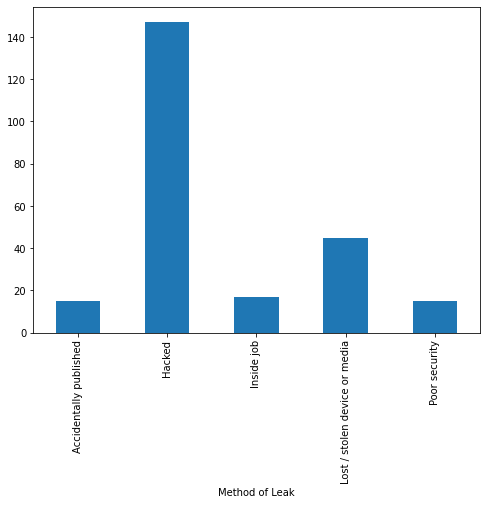

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby(['Method of Leak']).Story.count().plot.bar(ylim=0)
plt.show()

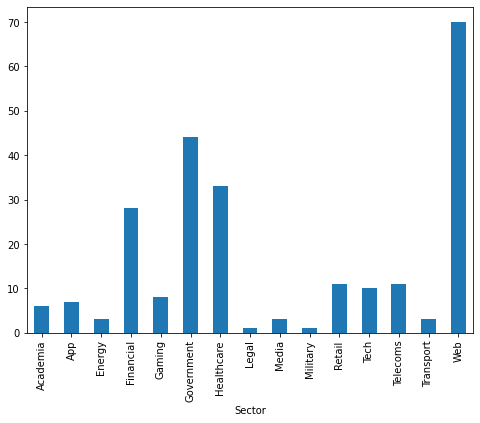

In [ ]:
fig = plt.figure(figsize=(8,6))
df.groupby('Sector').Story.count().plot.bar(ylim=0)
plt.show()

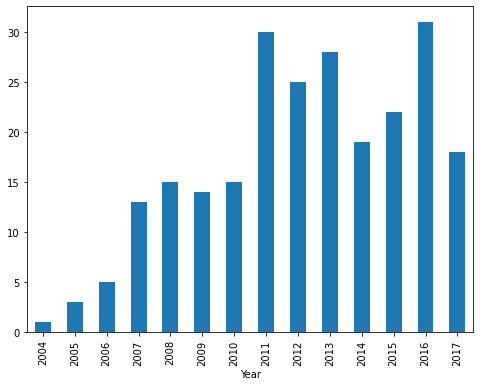

In [ ]:
fig = plt.figure(figsize=(8,6))
df.groupby('Year').Story.count().plot.bar(ylim=0)
plt.show()

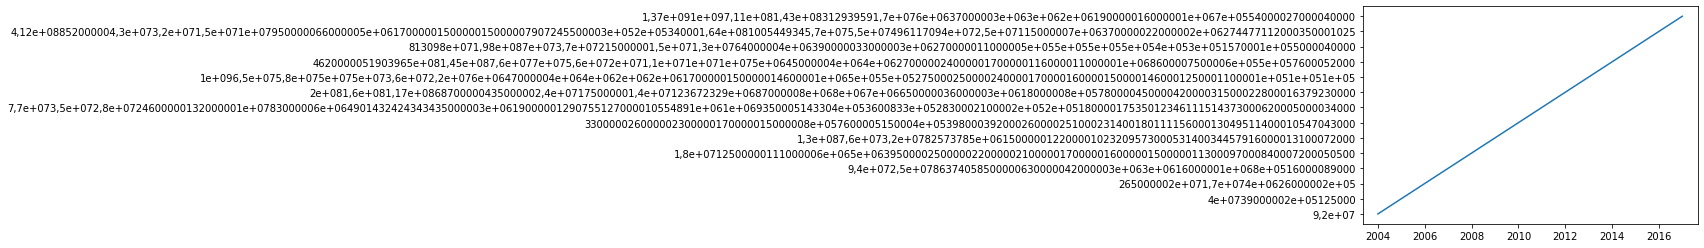

In [ ]:
 dfplt = pd.DataFrame()
dfplot = df.groupby('Year')['Records Lost'].sum()
dh = dfplot.to_frame()
plt.plot(dh['Records Lost'])

2.DATA CLEANING

In [ ]:
import re
from wordcloud import WordCloud, STOPWORDS
import networkx as nx
import nltk
from nltk.corpus import stopwords
import itertools
import collections
from nltk import bigrams
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from sklearn.cluster import KMeans
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from textblob import TextBlob
from bs4 import BeautifulSoup

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
df['Story']
dword = df['Story'].dropna()
dword

0      A dodgy backup has allegedly resulted in over ...
1      A report says that full data base has been exp...
2      A misconfigured spambot has leaked over 700m r...
3      Usernames, email addresses, passwords for site...
4      If you have a credit report, there’s a good ch...
                             ...                        
264    Laptop lost/stolen containing employee data: n...
265    CardSystems was fingered by MasterCard after i...
266    Blame the messenger! A box of computer tapes c...
267    Computer backup tape containing personal infor...
269    A former America Online software engineer stol...
Name: Story, Length: 239, dtype: object

In [ ]:
df['Method of Leak'].value_counts()

Hacked                           168
Lost / stolen device or media     49
Inside job                        19
Accidentally published            17
Poor security                     17
Name: Method of Leak, dtype: int64

In [ ]:
import nltk
nltk.download('stopwords')
def clean(x):
 x=BeautifulSoup(x).get_text()
 x=re.sub('[^a-zA-Z]',' ',x)
 x=x.lower().split()
 stop=set(stopwords.words('english'))
 words=[w for w in x if not w in stop]
 return(' '.join(words))
dword=dword.apply(lambda x:clean(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
 display(dword.head(10))

0    dodgy backup allegedly resulted billion leaked...
1    report says full data base exposed aadhaar uni...
2    misconfigured spambot leaked records although ...
3    usernames email addresses passwords sites incl...
4    credit report good chance one million american...
5       email addresses extracted associated passwords
6    oct data numerous malaysian telco mvno provide...
7    feb usernames passwords ip addresses stolen al...
8    user accounts hacked using forged cookies log ...
9      dec app developer failed secure database server
Name: Story, dtype: object

In [ ]:
words_in_story = [story.lower().split() for story in dword]
words_in_story[0]

['dodgy',
 'backup',
 'allegedly',
 'resulted',
 'billion',
 'leaked',
 'email',
 'addresses',
 'plus',
 'personal',
 'info',
 'cases',
 'exposed',
 'rcm',
 'business',
 'plans',
 'operations']

In [ ]:
stop_words = set(stopwords.words('english'))
list(stop_words)[0:10]
story_nsw = [[word for word in story_words if not word in stop_words]
 for story_words in words_in_story]
story_nsw[0]


['dodgy',
 'backup',
 'allegedly',
 'resulted',
 'billion',
 'leaked',
 'email',
 'addresses',
 'plus',
 'personal',
 'info',
 'cases',
 'exposed',
 'rcm',
 'business',
 'plans',
 'operations']

In [ ]:
all_words_nsw = list(itertools.chain(*story_nsw))
counts_nsw = collections.Counter(all_words_nsw)
counts_nsw.most_common(15)

[('data', 92),
 ('numbers', 91),
 ('information', 75),
 ('addresses', 64),
 ('million', 63),
 ('security', 61),
 ('stolen', 52),
 ('passwords', 49),
 ('names', 48),
 ('records', 39),
 ('social', 39),
 ('personal', 32),
 ('details', 32),
 ('card', 32),
 ('hackers', 30)]

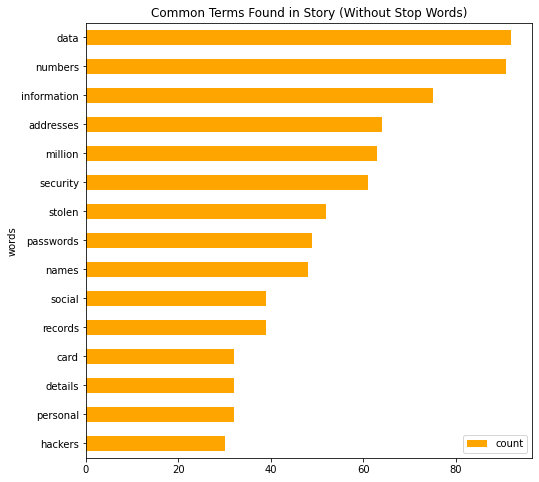

In [ ]:
clean_story_nsw = pd.DataFrame(counts_nsw.most_common(15),
 columns=['words', 'count'])
fig, ax = plt.subplots(figsize=(8, 8))
clean_story_nsw.sort_values(by='count').plot.barh(x='words',
 y='count',
 ax=ax,
 color="orange")
ax.set_title("Common Terms Found in Story (Without Stop Words)")
plt.show()

In [ ]:
terms_bigram = [list(bigrams(term)) for term in story_nsw]
terms_bigram[0]

[('dodgy', 'backup'),
 ('backup', 'allegedly'),
 ('allegedly', 'resulted'),
 ('resulted', 'billion'),
 ('billion', 'leaked'),
 ('leaked', 'email'),
 ('email', 'addresses'),
 ('addresses', 'plus'),
 ('plus', 'personal'),
 ('personal', 'info'),
 ('info', 'cases'),
 ('cases', 'exposed'),
 ('exposed', 'rcm'),
 ('rcm', 'business'),
 ('business', 'plans'),
 ('plans', 'operations')]

In [ ]:
bigrams = list(itertools.chain(*terms_bigram))
bigram_counts = collections.Counter(bigrams)
bigram_counts.most_common(30)
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
 columns=['bigram', 'count'])
bigram_df

,bigram,count
0,"(social, security)",39
1,"(security, numbers)",38
2,"(email, addresses)",20
3,"(credit, card)",17
4,"(names, addresses)",17
5,"(phone, numbers)",16
6,"(dates, birth)",15
7,"(personal, information)",14
8,"(e, mail)",10
9,"(mail, addresses)",10


In [ ]:
 nltk.download('vader_lexicon')
  
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk.corpus import stopwords
from nltk import tokenize
sentiment = pd.DataFrame()
sid = SentimentIntensityAnalyzer()
sentiment['sentiment_compound_polarity']=dword.apply(lambda x:sid.polarity_scores(x)['compound'])
sentiment['sentiment_neutral']=dword.apply(lambda x:sid.polarity_scores(x)['neu'])
sentiment['sentiment_negative']=dword.apply(lambda x:sid.polarity_scores(x)['neg'])
sentiment['sentiment_pos']=dword.apply(lambda x:sid.polarity_scores(x)['pos'])
sentiment['sentiment_type']=''
sentiment.loc[sentiment.sentiment_compound_polarity>0,'sentiment_type']='Positive'
sentiment.loc[sentiment.sentiment_compound_polarity==0,'sentiment_type']='Neutral'
sentiment.loc[sentiment.sentiment_compound_polarity<0,'sentiment_type']='Negative'
sentiment.head(3)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type
0,-0.5423,0.718,0.282,0.000,Negative
1,-0.3612,0.789,0.129,0.082,Negative
2,-0.6597,0.597,0.403,0.000,Negative


In [ ]:
sentiment.sentiment_type.value_counts()

Negative    139
Positive     61
Neutral      39
Name: sentiment_type, dtype: int64

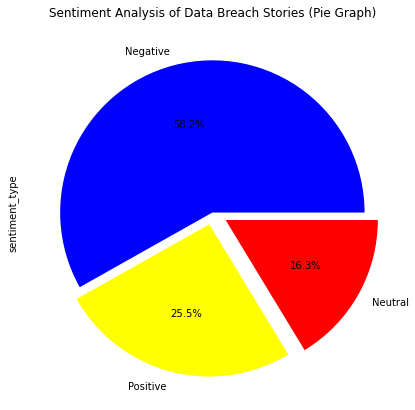

In [ ]:
colors = ['blue', 'yellow', 'red']
explode = (0, 0.08, 0.1)
sentiment.sentiment_type.value_counts().plot(kind='pie', figsize=(9, 7), title="Sentiment Analysis of Data Breach Stories (Pie Graph)", colors=colors, explode=explode,autopct='%1.1f%%', shadow=False)

In [ ]:
df['Method of Leak'].value_counts()

Hacked                           168
Lost / stolen device or media     49
Inside job                        19
Accidentally published            17
Poor security                     17
Name: Method of Leak, dtype: int64

In [ ]:
list(df.columns.values)


['Entity',
 'Alternative Name',
 'Story',
 'Year',
 'Records Lost',
 'Sector',
 'Method of Leak',
 '1st source',
 '2nd source',
 '3rd source',
 'Source name']

In [ ]:
dfmodel = pd.DataFrame()
dfmodel['Story'] = df['Story']
dfmodel['Method of Leak'] = df['Method of Leak']

In [ ]:
dfmodel

,Story,Method of Leak
0,A dodgy backup has allegedly resulted in over ...,Accidentally published
1,A report says that full data base has been exp...,Poor security
2,A misconfigured spambot has leaked over 700m r...,Poor security
3,"Usernames, email addresses, passwords for site...",Hacked
4,"If you have a credit report, there’s a good ch...",Hacked
...,...,...
265,CardSystems was fingered by MasterCard after i...,Hacked
266,Blame the messenger! A box of computer tapes c...,Lost / stolen device or media
267,Computer backup tape containing personal infor...,Lost / stolen device or media
268,NaN,Poor security


In [ ]:
dfmodel = dfmodel.dropna()
dfmodel.head()

,Story,Method of Leak
0,A dodgy backup has allegedly resulted in over ...,Accidentally published
1,A report says that full data base has been exp...,Poor security
2,A misconfigured spambot has leaked over 700m r...,Poor security
3,"Usernames, email addresses, passwords for site...",Hacked
4,"If you have a credit report, there’s a good ch...",Hacked


In [ ]:
dfmodel['Method of Leak'].value_counts()

Hacked                           147
Lost / stolen device or media     45
Inside job                        17
Accidentally published            15
Poor security                     15
Name: Method of Leak, dtype: int64

In [ ]:
dfmodel["label"] = dfmodel['Method of Leak'].map({'Hacked':0,     
'Lost / stolen device or media':1,
'Inside job ' : 2,
'Accidentally published' : 3,
'Poor security' : 4, 
'Inside job' : 5 })
dfmodel = dfmodel.dropna()
dfmodel

,Story,Method of Leak,label
0,A dodgy backup has allegedly resulted in over ...,Accidentally published,3
1,A report says that full data base has been exp...,Poor security,4
2,A misconfigured spambot has leaked over 700m r...,Poor security,4
3,"Usernames, email addresses, passwords for site...",Hacked,0
4,"If you have a credit report, there’s a good ch...",Hacked,0
...,...,...,...
264,Laptop lost/stolen containing employee data: n...,Lost / stolen device or media,1
265,CardSystems was fingered by MasterCard after i...,Hacked,0
266,Blame the messenger! A box of computer tapes c...,Lost / stolen device or media,1
267,Computer backup tape containing personal infor...,Lost / stolen device or media,1


In [ ]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(dfmodel['Story'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(text_counts, dfmodel['label'], test_size=0.2,shuffle=True, random_state=105)

**1.Applying Multinomial Naive Bayes classifier model for Prediction**

In [ ]:
model1 = MultinomialNB().fit(X_train, y_train)
md1predicted= model1.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, md1predicted))
print("confusion_matrix",confusion_matrix(y_test,md1predicted))

MultinomialNB Accuracy: 0.6875
confusion_matrix [[26  2  0  2  1]
 [ 0  6  0  0  0]
 [ 4  2  0  0  1]
 [ 0  0  0  0  0]
 [ 2  1  0  0  1]]


classification_report
              precision    recall  f1-score   support

           0       0.81      0.84      0.83        31
           1       0.55      1.00      0.71         6
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         0
           5       0.33      0.25      0.29         4

    accuracy                           0.69        48
   macro avg       0.34      0.42      0.36        48
weighted avg       0.62      0.69      0.65        48



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


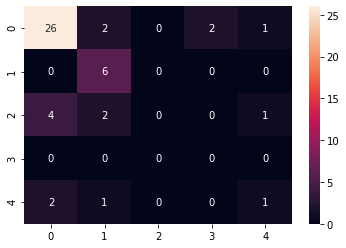

In [ ]:
conf_mat = confusion_matrix(y_test,md1predicted)
ax = sns.heatmap(conf_mat, annot=True, fmt="d")
print("classification_report")
print(classification_report(y_test,md1predicted))

**2.Applying Random Forest Model for Prediction**

In [ ]:
model2 = RandomForestClassifier(n_estimators=1000, random_state=0)
model2.fit(X_train, y_train)
md2predicted = model2.predict(X_test)
print("Random Forest Accuracy",metrics.accuracy_score(y_test, md2predicted))
print("confusion_matrix",confusion_matrix(y_test,md2predicted))

Random Forest Accuracy 0.7708333333333334
confusion_matrix [[31  0  0  0]
 [ 0  6  0  0]
 [ 7  0  0  0]
 [ 4  0  0  0]]


classification_report
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        31
           1       1.00      1.00      1.00         6
           3       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         4

    accuracy                           0.77        48
   macro avg       0.43      0.50      0.46        48
weighted avg       0.60      0.77      0.67        48



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


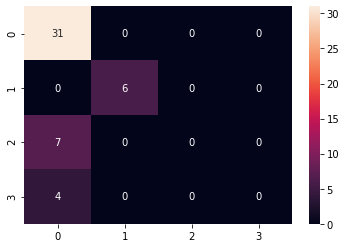

In [ ]:
conf_mat = confusion_matrix(y_test,md2predicted)
ax = sns.heatmap(conf_mat, annot=True, fmt="d")
print("classification_report")
print(classification_report(y_test,md2predicted))

**3.Applying Stochastic Gradient Descent model for prediction**

In [ ]:
model3 = SGDClassifier().fit(X_train, y_train)
model3.fit(X_train, y_train)
md3predicted = model3.predict(X_test)
print("SGD Accuracy",metrics.accuracy_score(y_test, md3predicted))
print("confusion_matrix")
print(confusion_matrix(y_test,md3predicted))

SGD Accuracy 0.7083333333333334
confusion_matrix
[[28  1  1  1  0]
 [ 0  6  0  0  0]
 [ 5  1  0  0  1]
 [ 0  0  0  0  0]
 [ 3  1  0  0  0]]


classification_report
              precision    recall  f1-score   support

           0       0.78      0.90      0.84        31
           1       0.67      1.00      0.80         6
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         4

    accuracy                           0.71        48
   macro avg       0.29      0.38      0.33        48
weighted avg       0.59      0.71      0.64        48



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


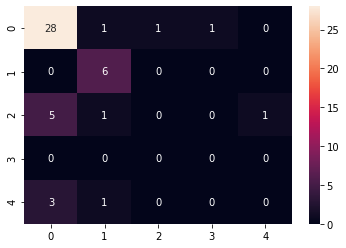

In [ ]:
conf_mat = confusion_matrix(y_test,md3predicted)
ax = sns.heatmap(conf_mat, annot=True, fmt="d")
print("classification_report")
print(classification_report(y_test,md3predicted))

**4.Applying Gradient Boosting Classifier Model for Prediction**

In [ ]:
model4 = GradientBoostingClassifier().fit(X_train, y_train)
model4.fit(X_train, y_train)
md4predicted = model4.predict(X_test)
print("Gradient Boosting Classifier Accuracy",metrics.accuracy_score(y_test, md4predicted))
print("confusion_matrix")
print(confusion_matrix(y_test,md4predicted))

Gradient Boosting Classifier Accuracy 0.75
confusion_matrix
[[30  0  0  0  1]
 [ 1  5  0  0  0]
 [ 3  2  0  1  1]
 [ 0  0  0  0  0]
 [ 3  0  0  0  1]]


classification_report
              precision    recall  f1-score   support

           0       0.81      0.97      0.88        31
           1       0.71      0.83      0.77         6
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         0
           5       0.33      0.25      0.29         4

    accuracy                           0.75        48
   macro avg       0.37      0.41      0.39        48
weighted avg       0.64      0.75      0.69        48



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


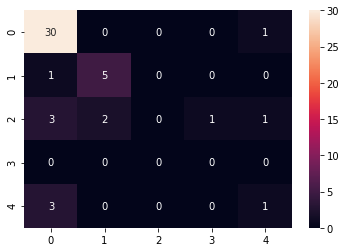

In [ ]:
conf_mat = confusion_matrix(y_test,md4predicted)
ax = sns.heatmap(conf_mat, annot=True, fmt="d")
print("classification_report")
print(classification_report(y_test,md4predicted))

**5.Applying XGBoost Model for Prediction**

In [ ]:
model5 = XGBClassifier().fit(X_train, y_train)
model5.fit(X_train, y_train)
md5predicted = model5.predict(X_test)
print("XGBOOST Accuracy",metrics.accuracy_score(y_test, md5predicted))
print("confusion_matrix")
print(confusion_matrix(y_test,md5predicted))

XGBOOST Accuracy 0.75
confusion_matrix
[[30  1  0  0]
 [ 1  5  0  0]
 [ 5  1  0  1]
 [ 3  0  0  1]]


classification_report
              precision    recall  f1-score   support

           0       0.77      0.97      0.86        31
           1       0.71      0.83      0.77         6
           3       0.00      0.00      0.00         7
           5       0.50      0.25      0.33         4

    accuracy                           0.75        48
   macro avg       0.50      0.51      0.49        48
weighted avg       0.63      0.75      0.68        48



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


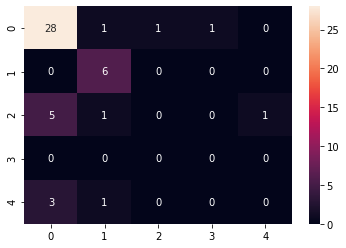

In [ ]:
conf_mat = confusion_matrix(y_test,md3predicted)
ax = sns.heatmap(conf_mat, annot=True, fmt="d")
print("classification_report")
print(classification_report(y_test,md5predicted))